<a href="https://colab.research.google.com/github/AFBA1993/DeepLearningTutorials/blob/main/autoencoders/deep_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()
previsores_treinamento = previsores_treinamento.astype('float32')/255
previsores_teste = previsores_teste.astype('float32')/255

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

In [4]:
autoencoder = Sequential()

autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))

autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))

In [5]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                                              metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 50, batch_size =256,
                validation_data = (previsores_teste, previsores_teste))

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.2516 - accuracy: 0.0098 - val_loss: 0.1664 - val_accuracy: 0.0124
Epoch 2/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1490 - accuracy: 0.0127 - val_loss: 0.1354 - val_accuracy: 0.0140
Epoch 3/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1300 - accuracy: 0.0139 - val_loss: 0.1230 - val_accuracy: 0.0137
Epoch 4/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1207 - accuracy: 0.0139 - val_loss: 0.1160 - val_accuracy: 0.0108
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1150 - accuracy: 0.0136 - val_loss: 0.1114 - val_accuracy: 0.0125
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1107 - accuracy: 0.0136 - val_loss: 0.1076 - val_accuracy: 0.0118
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1074 - accuracy: 0.0141 - val_loss: 0.1050 - val_accuracy: 0.0153

In [7]:
dimensao_original = Input(shape = (784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]

encoder = Model(dimensao_original, 
                camada_encoder3(camada_encoder2
                                (camada_encoder1(dimensao_original))))

In [8]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

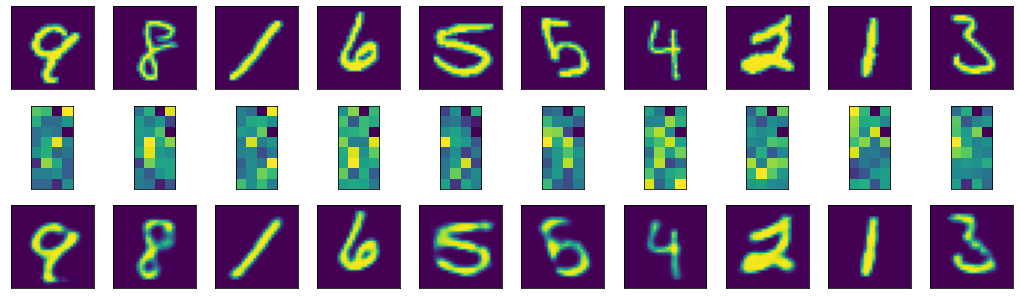

In [12]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):   
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())